<a href="https://colab.research.google.com/github/aliya-fatma011/Machine-Learning/blob/main/random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [82]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)


In [83]:

df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,1.270659,-2.505831,0.289432,1.000117,1.194259,1
1,0.940951,-2.113370,-0.299646,1.164524,1.621219,1
2,0.739055,0.589959,-0.234249,1.532033,1.766753,0
3,0.675560,-0.414929,0.483494,1.041591,1.306604,1
4,-0.592511,-0.261337,-0.167741,1.593853,1.697656,0


In [84]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)



In [154]:
# function for feature sampling
def sample_features(df,percent):
  # Sample from feature columns (excluding the 'target' column)
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))

  # Create a new DataFrame with the sampled features and add the 'target' column back
  new_df = df[cols].copy() # Use .copy() to avoid SettingWithCopyWarning
  new_df['target'] = df['target']
  return new_df

In [166]:

# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)


In [101]:
df1=sample_rows(df,0.2)

In [187]:
df1=sample_features(df,0.8)

In [129]:
df2=sample_rows(df,0.2)


In [188]:
df2=sample_features(df,0.8)

In [103]:
df3=sample_rows(df,0.2)

In [189]:
df3=sample_features(df,0.8)

In [104]:
df1.shape

(20, 6)

In [105]:
df2.shape

(20, 6)

In [181]:
df3.shape

(50, 3)

In [178]:

df1 = combined_sampling(df,0.5,0.5)

In [179]:


df2 = combined_sampling(df,0.5,0.5)

In [180]:

df3 = combined_sampling(df,0.5,0.5)


In [190]:

print(df1.columns)
print(df2.columns)
print(df3.columns)


Index(['col2', 'col3', 'col5', 'col4', 'target'], dtype='object')
Index(['col4', 'col1', 'col2', 'col5', 'target'], dtype='object')
Index(['col4', 'col1', 'col5', 'col3', 'target'], dtype='object')


In [191]:


df2

,col4,col1,col2,col5,target
0,1.000117,1.270659,-2.505831,1.194259,1
1,1.164524,0.940951,-2.113370,1.621219,1
2,1.532033,0.739055,0.589959,1.766753,0
3,1.041591,0.675560,-0.414929,1.306604,1
4,1.593853,-0.592511,-0.261337,1.697656,0
...,...,...,...,...,...
95,1.861901,0.778132,-0.071405,0.121673,1
96,1.542441,-1.211955,-2.113878,-0.036846,0
97,1.040972,1.220182,-2.198728,1.535107,1
98,1.804113,1.984884,-1.809211,-0.384457,1


In [192]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()


In [193]:
clf1.fit(df1.iloc[:,0:3],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:3],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:3],df3.iloc[:,-1])


DecisionTreeClassifier()

In [194]:


from sklearn.tree import plot_tree

[Text(0.6774193548387096, 0.9545454545454546, 'x[1] <= 0.225\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.5483870967741935, 0.8636363636363636, 'x[0] <= -2.491\ngini = 0.379\nsamples = 59\nvalue = [44, 15]'),
 Text(0.6129032258064515, 0.9090909090909092, 'True  '),
 Text(0.4838709677419355, 0.7727272727272727, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6129032258064516, 0.7727272727272727, 'x[2] <= 1.663\ngini = 0.32\nsamples = 55\nvalue = [44, 11]'),
 Text(0.5483870967741935, 0.6818181818181818, 'x[2] <= 1.369\ngini = 0.393\nsamples = 41\nvalue = [30, 11]'),
 Text(0.4838709677419355, 0.5909090909090909, 'x[0] <= -0.367\ngini = 0.307\nsamples = 37\nvalue = [30, 7]'),
 Text(0.3225806451612903, 0.5, 'x[2] <= 0.426\ngini = 0.251\nsamples = 34\nvalue = [29, 5]'),
 Text(0.1935483870967742, 0.4090909090909091, 'x[1] <= -1.135\ngini = 0.1\nsamples = 19\nvalue = [18, 1]'),
 Text(0.12903225806451613, 0.3181818181818182, 'x[1] <= -1.221\ngini = 0.32\nsamples = 5\nvalue = [4, 

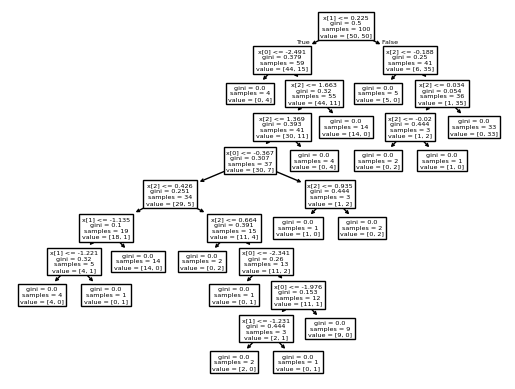

In [195]:


plot_tree(clf1)

[Text(0.5657894736842105, 0.9375, 'x[1] <= -0.004\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.3157894736842105, 0.8125, 'x[2] <= 0.431\ngini = 0.206\nsamples = 43\nvalue = [38, 5]'),
 Text(0.4407894736842105, 0.875, 'True  '),
 Text(0.2631578947368421, 0.6875, 'x[2] <= -0.356\ngini = 0.136\nsamples = 41\nvalue = [38, 3]'),
 Text(0.15789473684210525, 0.5625, 'x[2] <= -1.446\ngini = 0.057\nsamples = 34\nvalue = [33, 1]'),
 Text(0.10526315789473684, 0.4375, 'x[2] <= -1.528\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.05263157894736842, 0.3125, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.15789473684210525, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.21052631578947367, 0.4375, 'gini = 0.0\nsamples = 24\nvalue = [24, 0]'),
 Text(0.3684210526315789, 0.5625, 'x[1] <= -0.517\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(0.3157894736842105, 0.4375, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.42105263157894735, 0.4375, 'gini = 0.0\nsample

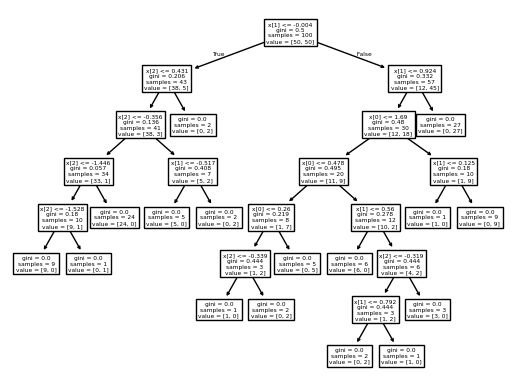

In [196]:
plot_tree(clf2)

[Text(0.5, 0.9444444444444444, 'x[1] <= -0.004\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.2, 0.8333333333333334, 'x[0] <= 2.807\ngini = 0.206\nsamples = 43\nvalue = [38, 5]'),
 Text(0.35, 0.8888888888888888, 'True  '),
 Text(0.13333333333333333, 0.7222222222222222, 'x[2] <= 0.521\ngini = 0.172\nsamples = 42\nvalue = [38, 4]'),
 Text(0.06666666666666667, 0.6111111111111112, 'gini = 0.0\nsamples = 22\nvalue = [22, 0]'),
 Text(0.2, 0.6111111111111112, 'x[2] <= 0.698\ngini = 0.32\nsamples = 20\nvalue = [16, 4]'),
 Text(0.13333333333333333, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.26666666666666666, 0.5, 'x[2] <= 1.268\ngini = 0.266\nsamples = 19\nvalue = [16, 3]'),
 Text(0.2, 0.3888888888888889, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.3333333333333333, 0.3888888888888889, 'x[2] <= 2.057\ngini = 0.375\nsamples = 12\nvalue = [9, 3]'),
 Text(0.26666666666666666, 0.2777777777777778, 'x[1] <= -0.922\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.2, 

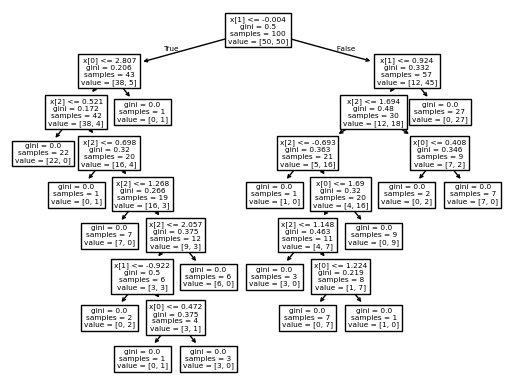

In [197]:

plot_tree(clf3)

In [120]:

clf1.predict(np.array([1.270659,	-2.505831	,0.289432,	1.000117,	1.194259]).reshape(1,5))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [121]:


clf2.predict(np.array([1.270659,	-2.505831	,0.289432,	1.000117,	1.194259]).reshape(1,5))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [123]:
clf3.predict(np.array([1.270659,	-2.505831	,0.289432,	1.000117,	1.194259]).reshape(1,5))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [74]:

df.sample(14,replace=True)

,col1,col2,col3,col4,col5,target
17,2.889977,-1.281452,-2.113845,1.273953,-2.795072,0
58,0.190259,0.651896,1.028205,-0.453618,1.904073,1
39,-1.389708,0.527844,0.145794,-1.044594,3.072698,1
0,-1.923578,1.998805,-1.764899,1.789182,-0.562565,0
72,0.728138,0.901319,1.191299,-0.879571,1.760422,1
30,-2.447803,1.121077,0.286919,-1.653489,2.492952,1
37,-1.639312,1.289396,-1.724168,2.351562,0.760800,0
9,1.337630,-0.160706,1.887347,-0.826630,0.299603,0
66,0.775190,1.530776,0.866215,-0.869163,0.020706,1
42,-0.927336,1.347157,1.067422,-1.431155,0.602442,1
